# Part II - Data_Explanatory
## by Akubazgi Gebremariam

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [13]:
# importing custom lib 
from  Preprocessing import dataPreprocess
from data_info import DataInfo
from VisualisationPlots import VisualiseDf

In [15]:
# loading the data
df_bike_2019 = pd.read_csv('../Data/2019_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

In [6]:
df_bike_2019.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'month', 'start_day', 'hour', 'date'],
      dtype='object')

In [17]:
# shape
df_bike_2019.shape

(174952, 20)

## Bike usage analysis interms of user type
The dataset contains 174952 of records in the 201902 given data. Almoss, most of the user type are Subscribers. The following shows the number of user type in percentage. 
- Customer : 90.5%
- Subcriber : 9.5%

Thus most of the user types are permanent users who agrees to receive emails or notifications to use the bike ford company servies.

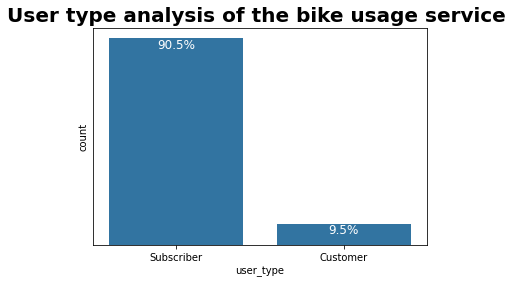

In [72]:
plt.title(f'User type analysis of the bike usage service ', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_bike_2019, df_bike_2019['user_type'])

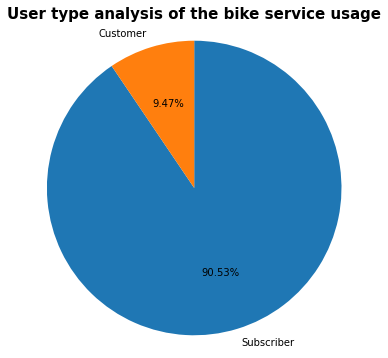

In [70]:
def pie_plot(column:pd.DataFrame, title):
        plt.figure(figsize=(10,6))
        sorted_counts = column.value_counts()
        plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
                counterclock = False, autopct='%1.2f%%');
        plt.axis('square')
        #plt.legend('user_type')
        plt.title(title, fontsize=15, fontweight ='bold');

pie_plot(df_bike_2019['user_type'],'User type analysis of the bike service usage')


## Member gender analysis 
- Most of the user men in terms of gender
- Femle users of the bike service looks like small in number.  

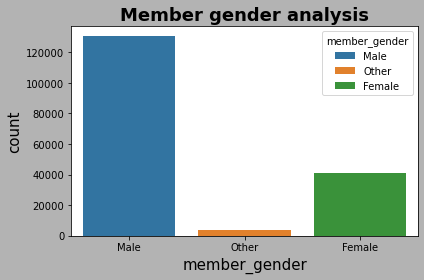

In [86]:
# member gender analysis using countplot
ax = sb.countplot(x='member_gender', hue='member_gender', dodge=False, data=df_bike_2019)
ax.set_title('Member gender analysis', fontsize=18, fontweight='bold', color='black')
ax.set_xlabel('member_gender', fontsize=15, color='black')
ax.set_ylabel('count', fontsize=15, color='black')
ax.figure.set_facecolor('0.7')
plt.tight_layout()
plt.show()

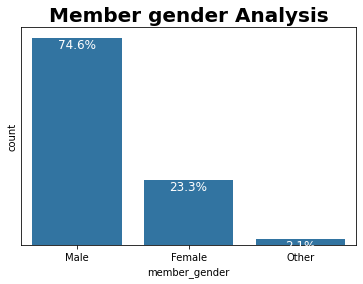

In [74]:
plt.title(f'Member gender Analysis', size=20, fontweight='bold')
VisualiseDf.plot_discriptive_count(df_bike_2019,df_bike_2019['member_gender'] )

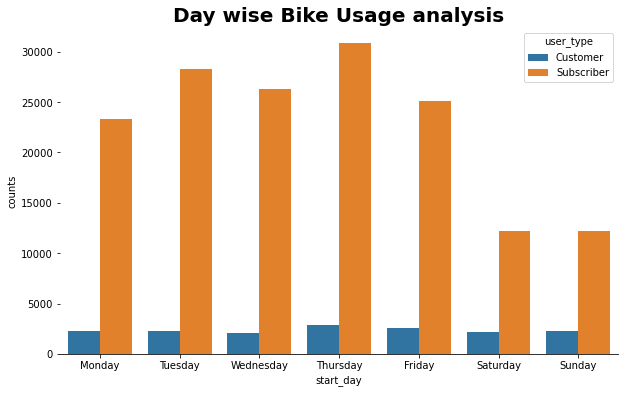

In [37]:
# code for 
def bar_plot(df, column,orders,heu1,title):
        plt.figure(figsize=(10,6))
        plt.title(title, size=20, fontweight='bold')
        chart = sb.countplot(data=df, x=column, order=orders, hue=heu1)

        chart.set(xlabel=column, ylabel='counts')

        # Remove legend title
        sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
        plt.gca().legend().set_title(heu1);

days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
bar_plot(df_bike_2019, 'start_day', days, 'user_type','Day wise Bike Usage analysis')

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## Bike usage analysis in by each Hour
- Most Subscribers use the service at peak hour.
- In contrast, Customers if have more flexible time, mostly at noon until afternoon.

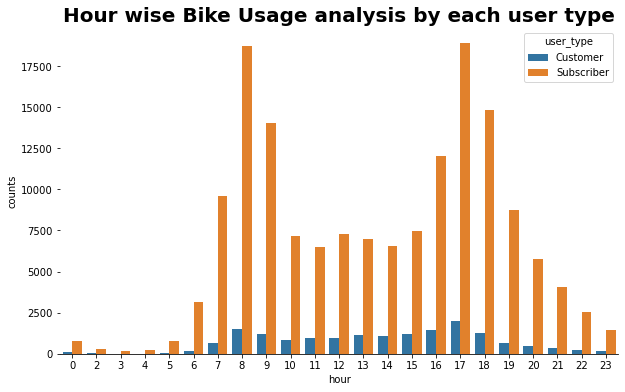

In [39]:
# calling the barplot function 
each_hour = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23] # order
bar_plot(df_bike_2019, 'hour', each_hour, 'user_type','Hour wise Bike Usage analysis by each user type')

## (Visualization 3)



In [41]:
# path
# import os
# import sys
# sys.path.append(os.path.abspath(os.path.join('../scripts')))
# from VisualisationPlots import VisualiseDf


In [21]:
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str) -> None:
        plt.figure(figsize=(12, 7))
        sb.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
        plt.title(title, size=20)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks( fontsize=14)
        plt.show()

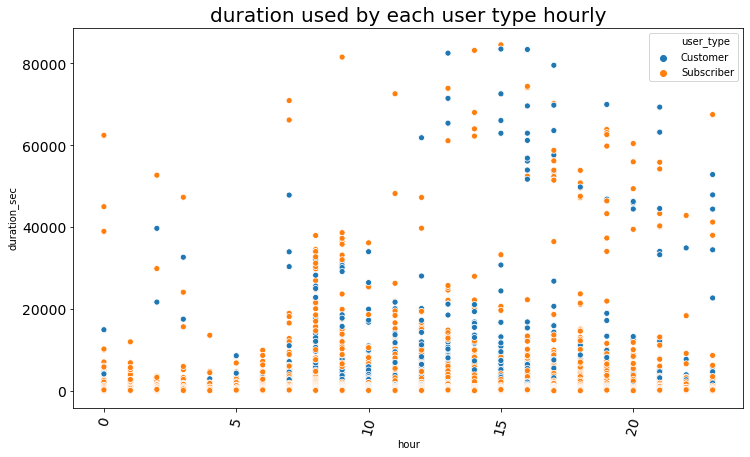

In [26]:
plot_scatter(df_bike_2019, 'hour','duration_sec', 'duration used by each user type hourly', 'user_type')

In [ ]:
 #calling the barplot function 
each_hour = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23] # order
bar_plot(df_bike_2019, 'hour', each_hour, 'user_type','Hour wise Bike Usage analysis by each user type')

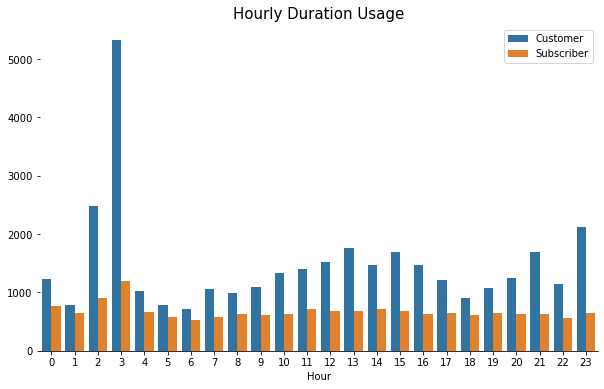

In [51]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
chart=sb.barplot(data=df_bike_2019, x='hour', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

In [27]:
# g = sb.FacetGrid(df_bike_2019, col="hour",  row="start_day")
# g.map(sb.scatterplot, "hour", "start_day")

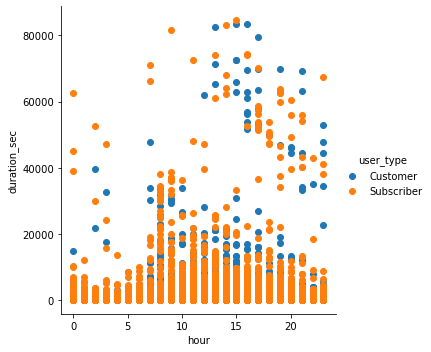

In [20]:
#sb.palplot(sb.color_palette(n_colors=9))

g = sb.FacetGrid(df_bike_2019, hue = 'user_type', size = 5)
g.map(plt.scatter, 'hour','duration_sec')
g.add_legend();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 